In [ ]:
import sgkit as sg
import pandas as pd

def is_nonsynonymous(mutation_string):
    # A20A (GCC/GCG) -> [A20A, (GCC/GCG)]
    mutation_code = mutation_string.to_series().str.split().str[0]
    # A ?= A
    return (mutation_code.str[0] != mutation_code.str[-1]).values

ds_linreg = sg.load_dataset('results/zarrs/Hinf_norm_mic_linreg_results.zarr/')
ds_linreg_ftsI = ds_linreg.sel(variants=((1688288 < ds_linreg.variant_position) & (ds_linreg.variant_position < 1690120)).compute())
ds_linreg_ftsI = ds_linreg_ftsI.sel(variants=is_nonsynonymous(ds_linreg_ftsI.mutation))


mutations_sbaine = ['D350N', 'S357N', 'A368T', 'L376I', 'M377I', 'S385T', 'L389F', 'L389V', 'L405F', 'D410N', 'G415R',
                    'V436A', 'A437S', 'I449V', 'L465F', 'V479F', 'E482K', 'V489R', 'G490E', 'A502T', 'A502V', 'A502S',
                    'V511A', 'R517H', 'N526K', 'N526H', 'A530S']



for mut in mutations_sbaine:
    
    d = ds_linreg_ftsI.sel(variants=(ds_linreg_ftsI.mutation.str.startswith(mut))).variants.values
    print(mut, d)


In [ ]:
ds_linreg_ftsI.mutation.loc['ID_1689667_C'].values

In [ ]:
mapping = pd.read_csv('results/mapping.csv')

mapping.query("(1688287 < position < 1690121) & (mutation.str.startswith('N526H'))")

In [ ]:
ds_mic_unfiltered = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/')
# ds_mic_unfiltered.sel(variants=ds_mic_unfiltered.variants ==
pos = 1688571
print(ds_mic_unfiltered.sel(variants=(ds_mic_unfiltered.variant_position == pos).compute()).pipe(sg.variant_stats).variant_allele_count.values)
print(ds_mic_unfiltered.sel(variants=(ds_mic_unfiltered.variant_position == pos).compute()).pipe(sg.variant_stats).variant_n_het.values)

In [2]:
import sgkit as sg
import pandas as pd

from scipy import sparse
from allel import plot_pairwise_ld

import seaborn as sns
import matplotlib.pyplot as plt


mutations_sbaine = ['D350N', 'S357N', 'A368T', 'L376I', 'M377I', 'S385T', 'L389F', 'L389V', 'L405F', 'D410N', 'G415R',
                    'V436A', 'A437S', 'I449V', 'L465F', 'V479F', 'E482K', 'V489R', 'G490E', 'A502T', 'A502V', 'A502S',
                    'V511A', 'R517H', 'N526K', 'N526H', 'A530S']

ds_linreg = sg.load_dataset('results/zarrs/Hinf_norm_mic_linreg_results.zarr/')
ds_linreg_ftsI = ds_linreg.sel(variants=((1688288 < ds_linreg.variant_position) & (ds_linreg.variant_position < 1690120)).compute())


ld = (ds_linreg_ftsI
    .assign(call_dosage= lambda ds: ds.call_genotype.sum(dim='ploidy'))
    .pipe(sg.window_by_position, size=10_000, offset=-5000, window_start_position="variant_position")
    .pipe(sg.ld_matrix)
    .compute()
)

# ld = sparse.coo_matrix((ld.value.values, (ld.i.values, ld.j.values))).tocsr()
# plot_pairwise_ld(ld.toarray())
# ld.toarray()
# fig, ax = plt.subplots(figsize=(10,10))
# im = ax.imshow(ld.toarray())
# sns.heatmap(ld.toarray(), mask=mask_ut, cmap="viridis")

In [88]:
import numpy as np	
mask_ut=np.tril(np.ones((163,163))).astype(bool)
mask_ut

array([[ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [3]:
ds_linreg_ftsI.variant_position[ld['i'].values].values

ld['i'] = ds_linreg_ftsI.variants[ld['i'].values]
ld['j'] = ds_linreg_ftsI.variants[ld['j'].values]
# ld['i']




In [4]:
import plotly.express as px
import plotly

df_ld = ld.pivot(index='i', columns='j', values='value')
fig = px.imshow(df_ld, width=2000, height=2000, color_continuous_scale='Turbo')

# fig.show()
plotly.io.write_image(fig, 'test/output_file.pdf', format='pdf')

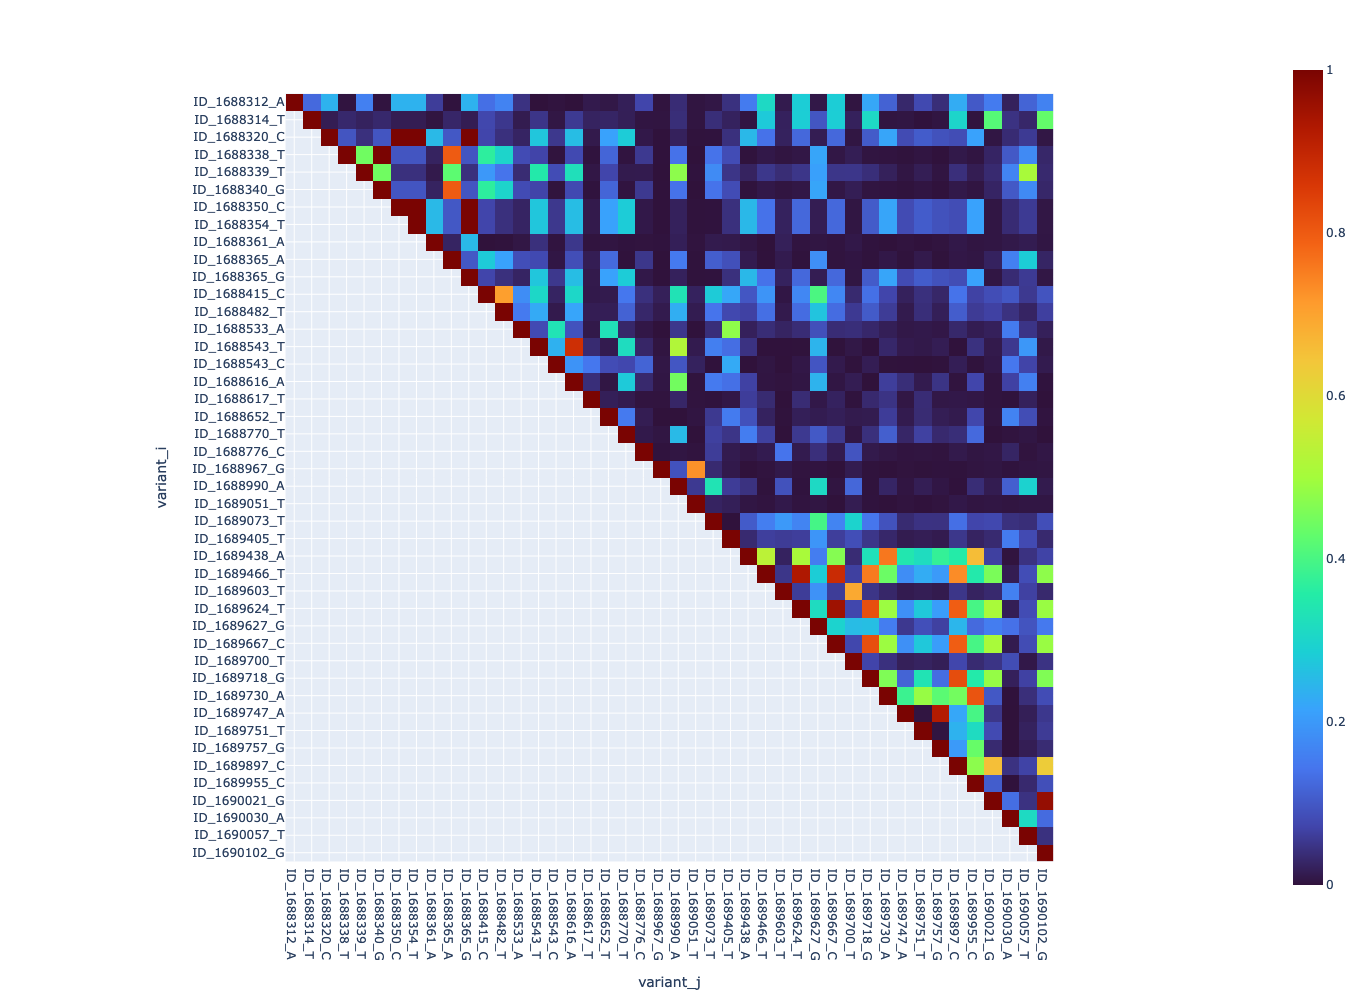

'../test/ld_matrix_ftsI_mutations_id.html'

In [20]:
import sgkit as sg

import plotly.express as px
import plotly


mutations_sbaine = ['D350N', 'S357N', 'A368T', 'L376I', 'M377I', 'S385T', 'L389F', 'L389V', 'L405F', 'D410N', 'G415R',
                    'V436A', 'A437S', 'I449V', 'L465F', 'V479F', 'E482K', 'V489R', 'G490E', 'A502T', 'A502V', 'A502S',
                    'V511A', 'R517H', 'N526K', 'N526H', 'A530S']


mutations_linreg = ['ID_1688312_A', 'ID_1688314_T', 'ID_1688320_C', 'ID_1688338_T',
       'ID_1688339_T', 'ID_1688340_G', 'ID_1688350_C', 'ID_1688354_T',
       'ID_1688361_A', 'ID_1688365_A', 'ID_1688365_G', 'ID_1688415_C',
       'ID_1688482_T', 'ID_1688533_A', 'ID_1688543_C', 'ID_1688543_T',
       'ID_1688616_A', 'ID_1688617_T', 'ID_1688652_T', 'ID_1688770_T',
       'ID_1688776_C', 'ID_1688967_G', 'ID_1688990_A', 'ID_1689051_T',
       'ID_1689405_T', 'ID_1689438_A', 'ID_1689466_T', 'ID_1689667_C',
       'ID_1689700_T', 'ID_1689747_A', 'ID_1689751_T', 'ID_1690021_G',
       'ID_1690057_T', 'ID_1690102_G']

# new anonation
mutations_linreg = ['ID_1688312_A', 'ID_1688314_T', 'ID_1688320_C', 'ID_1688338_T',
       'ID_1688339_T', 'ID_1688340_G', 'ID_1688350_C', 'ID_1688354_T',
       'ID_1688361_A', 'ID_1688365_A', 'ID_1688365_G', 'ID_1688415_C',
       'ID_1688482_T', 'ID_1688533_A', 'ID_1688543_T', 'ID_1688543_C',
       'ID_1688616_A', 'ID_1688617_T', 'ID_1688652_T', 'ID_1688770_T',
       'ID_1688776_C', 'ID_1688967_G', 'ID_1688990_A', 'ID_1689051_T',
       'ID_1689073_T', 'ID_1689405_T', 'ID_1689438_A', 'ID_1689466_T',
       'ID_1689603_T', 'ID_1689624_T', 'ID_1689627_G', 'ID_1689667_C',
       'ID_1689700_T', 'ID_1689718_G', 'ID_1689730_A', 'ID_1689747_A',
       'ID_1689751_T', 'ID_1689757_G', 'ID_1689897_C', 'ID_1689955_C',
       'ID_1690021_G', 'ID_1690030_A', 'ID_1690057_T', 'ID_1690102_G']

# mutations_linreg = ['ID_1688543_T', 'ID_1688543_C', 'ID_1688616_A', 'ID_1688617_T','ID_1688652_T', 'ID_1688770_T', 'ID_1688776_C', 'ID_1688967_G','ID_1688990_A', 'ID_1689051_T']
# mutations_linreg = ['ID_1688533_A', 'ID_1688543_T', 'ID_1688543_C', 'ID_1688616_A',
#                    'ID_1688617_T', 'ID_1688652_T', 'ID_1688770_T', 'ID_1688776_C',
#                    'ID_1688967_G', 'ID_1688990_A', 'ID_1689051_T', 'ID_1689073_T']

ds_linreg = sg.load_dataset('../results/zarrs/Hinf_norm_mic_linreg_logscaled_results.zarr/')
ds_linreg_ftsI = ds_linreg.sel(variants=((1688288 < ds_linreg.variant_position) & (ds_linreg.variant_position < 1690120)).compute())

ds_linreg_ftsI_mutations = ds_linreg_ftsI.sel(variants=ds_linreg_ftsI.variants.isin(mutations_linreg))

ld = (ds_linreg_ftsI_mutations
    .assign(call_dosage= lambda ds: ds.call_genotype.sum(dim='ploidy'))
    .pipe(sg.window_by_position, size=10_000, offset=-5000, window_start_position="variant_position")
    .pipe(sg.ld_matrix)
    .compute()
)

ds_linreg_ftsI_mutations.variant_position[ld['i'].values].values

ld['variant_i'] = ds_linreg_ftsI_mutations.variants[ld['i'].values]
ld['variant_j'] = ds_linreg_ftsI_mutations.variants[ld['j'].values]
ld['mutation_i'] = ds_linreg_ftsI_mutations.mutation[ld['i'].values]
ld['mutation_j'] = ds_linreg_ftsI_mutations.mutation[ld['j'].values]


df_ld = ld.pivot(index='variant_i', columns='variant_j', values='value').reindex(columns=ld['variant_i'].unique(), index=ld['variant_j'].unique())
fig = px.imshow(df_ld, width=1000, height=1000, color_continuous_scale='Turbo', labels={})
# ld
fig.show()
# plotly.io.write_image(fig, '../test/ld_matrix_ftsI_transpep_mutations_id.pdf', format='pdf')
# plotly.io.write_image(fig, '../test/ld_matrix_ftsI_transpep_mutations_id.html', format='html')
# plotly.offline.plot(fig, filename='../test/ld_matrix_ftsI_mutations_id.html')

In [51]:
df_ld.to_csv('../test/ld_ftsI_mutations.tsv', sep='\t')

In [14]:
ld[(ld.i == 'ID_1688543_C') &  (ld.j == 'ID_1689667_C') ]

i          j     value
6799  1688543_C  1689667_C  0.014916

In [18]:
ld[(ld.i == 'ID_1688582_C')].sort_values('value', ascending=False)[:10]

i          j     value
7480  1688582_C  1688582_C  1.000000
7481  1688582_C  1688588_C  0.743347
7516  1688582_C  1688849_G  0.604678
7515  1688582_C  1688825_T  0.506621
7497  1688582_C  1688693_T  0.476458
7499  1688582_C  1688711_G  0.469772
7498  1688582_C  1688699_G  0.469772
7495  1688582_C  1688687_A  0.462284
7527  1688582_C  1688954_C  0.423032
7520  1688582_C  1688876_A  0.392488

In [27]:
mapping = pd.read_csv('results/mapping.csv')
mapping[mapping.id == 'ID_1689667_C']

Unnamed: 0  position allele         mutation         id
100116     2134670   1689667      C  S152A (TCT/GCT)  1689667_C

/Users/lbartels/miniforge3/envs/hinf/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/lbartels/miniforge3/envs/hinf/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/lbartels/miniforge3/envs/hinf/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/lbartels/miniforge3/envs/hinf/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.me

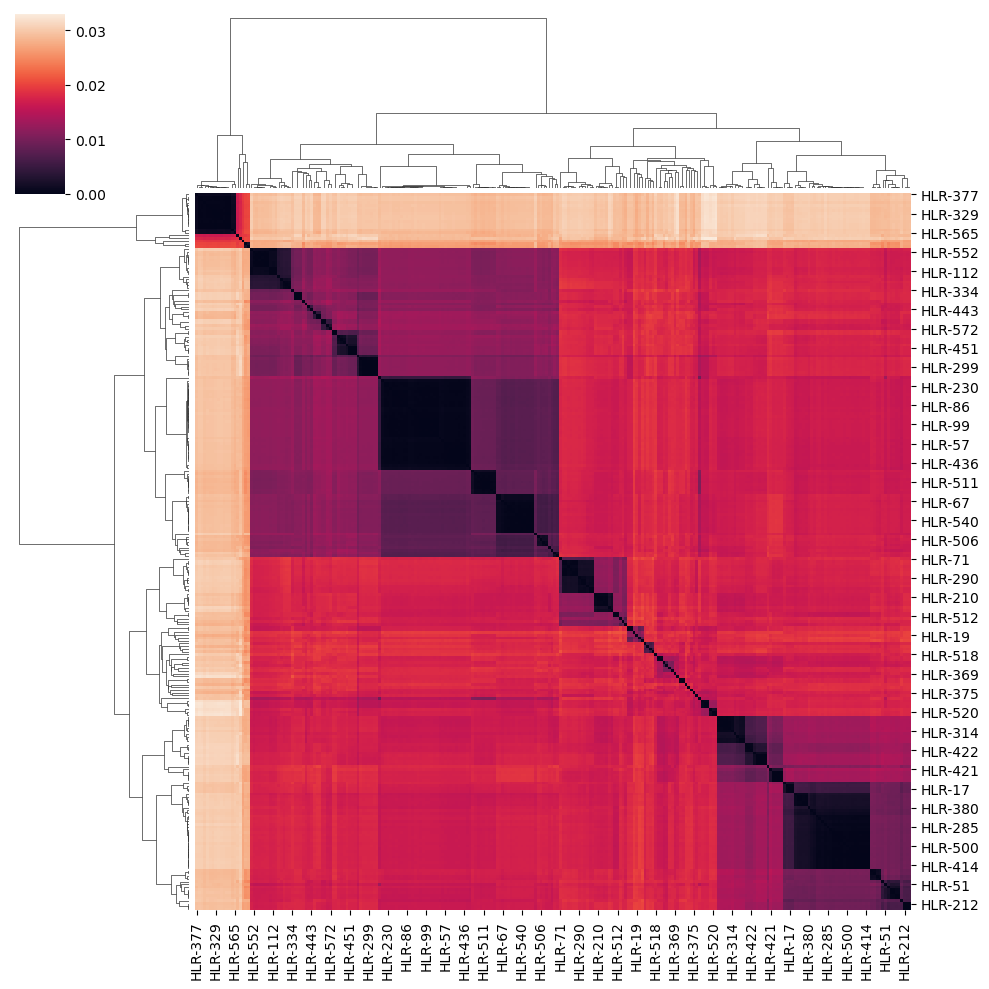

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.read_csv('/Users/lbartels/phylogeny_distances.tsv', sep='\t', index_col=0)
df_distances = pd.read_csv('../results/mash_normed.tsv', sep='\t', index_col=0)
sns.clustermap(df_distances)
plt.savefig('clustermap.pdf')

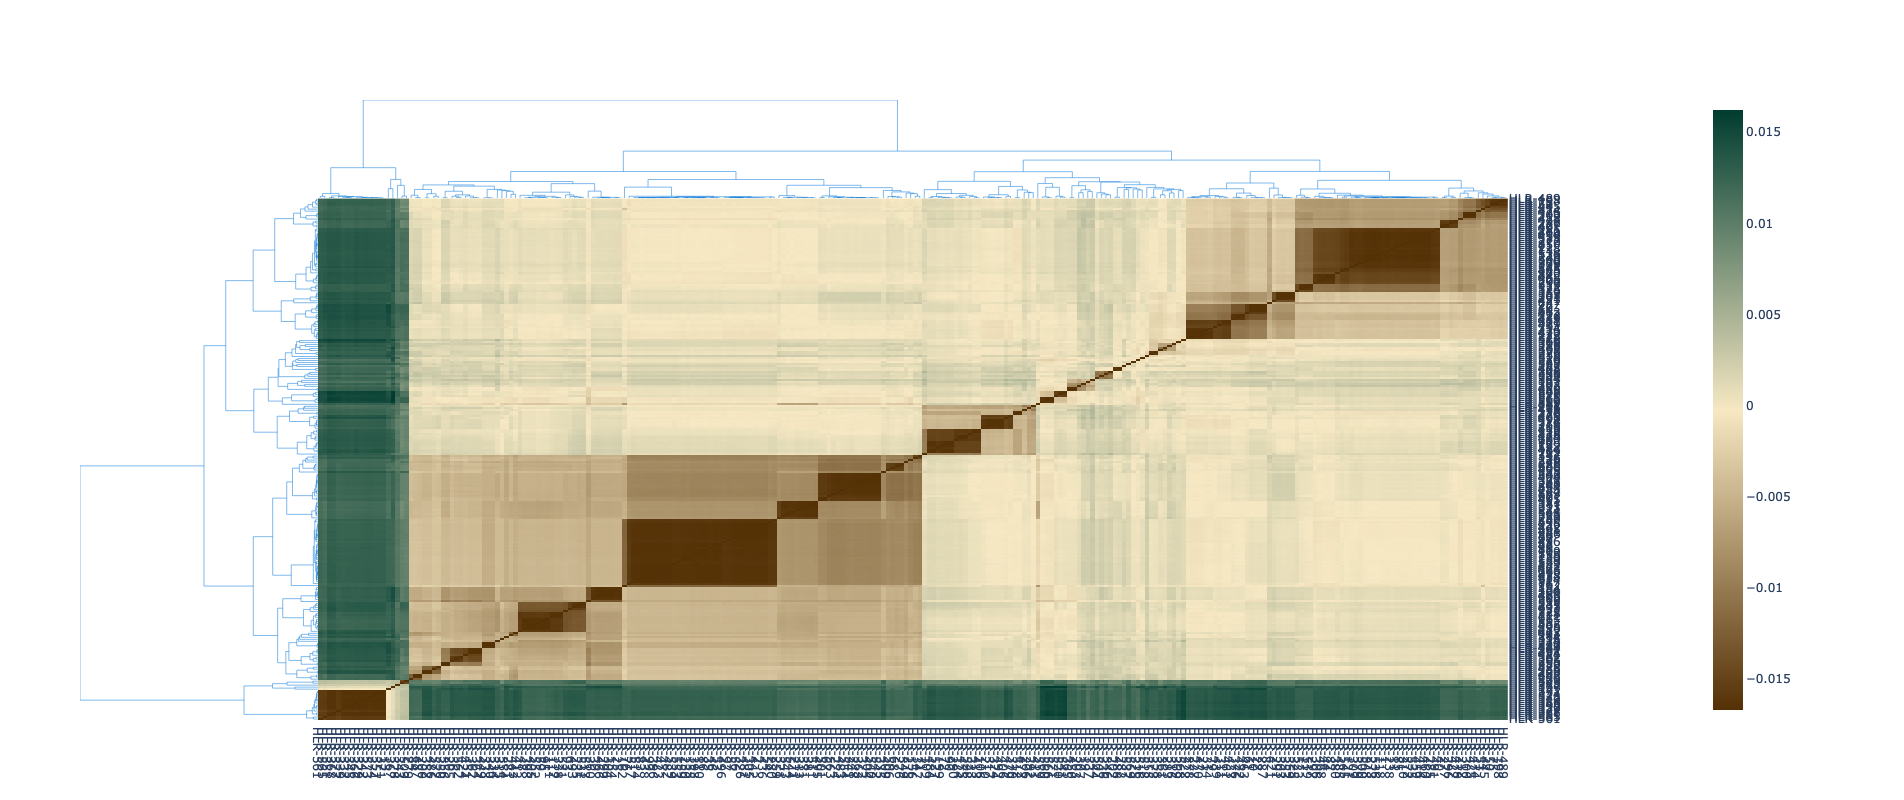

In [19]:
import pandas as pd
import dash_bio

# pd.read_csv('/Users/lbartels/phylogeny_distances.tsv', sep='\t', index_col=0)
df_distances = pd.read_csv('../results/mash_normed.tsv', sep='\t', index_col=0)


dash_bio.Clustergram(
    data=df_distances,
    column_labels=list(df_distances.columns.values),
    row_labels=list(df_distances.index),
    height=800,
    width=700
).show()


In [119]:
ds_linreg_rodA = sg.load_dataset('../results/zarrs/Hinf_norm_mic_linreg_results.zarr/')
ds_linreg_rodA = (ds_linreg_rodA.sel(variants= ((1019769 < ds_linreg_rodA.variant_position) & (ds_linreg_rodA.variant_position < 1021424)).compute())
                 # .assign(mutation_type= lambda df: ((df['mutation'] == '') | (df['mutation'].str.split().str[0].str[0] == df['mutation'].str.split().str[0].str[-1]))
                    # .apply(lambda x: 'synonymous' if x else 'nonsynonymous'))
)
ref = ds_linreg_rodA.mutation.to_series().str.split().str[0].str[0]
alt = ds_linreg_rodA.mutation.to_series().str.split().str[0].str[-1]
empty = ds_linreg_rodA.mutation.to_series() == ''
mask = ~(empty | (ref == alt))#.value_counts()
# ds_linreg_mrdA.mutation.values
bb = ds_linreg_rodA.sel(variants=mask.values).variant_position.values

In [121]:
pyseer = pd.read_csv('/Users/lbartels/amp_snps.plot', sep='\t', skiprows=[0], header=None)
pyseer[pyseer[2].isin(bb)].sort_values(4, ascending=False)

0  1        2         3         4  5
95448  26  .  1019910  3.712200  3.712200  0
95538  26  .  1020994  3.395770  3.395770  0
95459  26  .  1020072  2.511450  2.511450  0
95514  26  .  1020615  2.164310  2.164310  0
95482  26  .  1020237  2.119190  2.119190  0
95511  26  .  1020591  1.899630  1.899630  0
95485  26  .  1020314  1.684030  1.684030  0
95458  26  .  1020072  1.476250  1.476250  0
95506  26  .  1020541  1.342940  1.342940  0
95465  26  .  1020103  0.316053  0.316053  0
95449  26  .  1019925  0.314258  0.314258  0
95555  26  .  1021140  0.298432  0.298432  0
95504  26  .  1020526  0.293282  0.293282  0
95513  26  .  1020615  0.270026  0.270026  0
95493  26  .  1020367  0.270026  0.270026  0
95501  26  .  1020481  0.214670  0.214670  0
95470  26  .  1020153  0.071092  0.071092  0
95552  26  .  1021132  0.035740  0.035740  0
95532  26  .  1020878  0.032920  0.032920  0

In [124]:
ds_linreg_rodA.sel(variants=mask.values).mutation.values

array(['N48D (AAT/GAT)', 'K53Q (AAA/CAA)', 'L102V (CTG/GTG)',
       'H112R (CAT/CGT)', 'A129S (GCT/TCT)', 'V157M (GTG/ATG)',
       'N182K (AAC/AAA)', 'K200R (AAA/AGA)', 'R238H (CGC/CAC)',
       'T253I (ACC/ATC)', 'Q258R (CAA/CGA)', 'H275Y (CAC/TAC)',
       'A283T (GCC/ACC)', 'M370I (ATG/ATA)', 'A409V (GCG/GTG)',
       'D455G (GAT/GGT)', 'V458L (GTG/TTG)'], dtype=object)